## The Data: Pima Indian Classification

### Problem statement 
Using the UCI PIMA Indian Diabetes dataset to predict a person has diabetes or not using the medical attributes provided. (Target is column 8)

### Assumptions

This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points
Just these attributes are enough to diagnose the ailment
Similar Problems 
This is very much like some common 2 class classification problems like classifying mail into spam and ham based on the contents of the email. Obviously the attributes there would be strings and not numbers like this dataset, therefore the way in which we process at least some of the features will be different.

In [27]:
import pandas as pd
%pylab inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Populating the interactive namespace from numpy and matplotlib


In [16]:
df = pd.read_csv("data/pima-indians-diabetes.data",header=None)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.shape

(768, 9)

In [19]:
X=df[np.arange(8)]
y=df[8]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [22]:
accuracy_score(y_test, clf.predict(X_test))

0.72440944881889768

In [23]:
cross_val_score(clf, X, y) 

array([ 0.68093385,  0.734375  ,  0.72156863])

In [24]:
cross_val_score(clf, X, y).mean()

0.71229249319701937

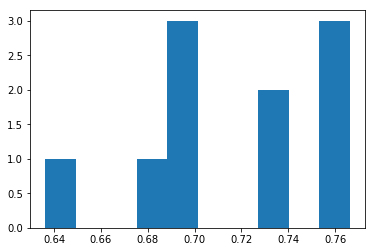

In [25]:
s=cross_val_score(clf, X, y, cv=10, scoring='accuracy')
plt.hist(s);

In [28]:
clf2 = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
                    param_grid={"n_neighbors": np.arange(1,50)},
                    scoring='accuracy')
clf2.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
clf2.best_params_

{'n_neighbors': 8}

In [30]:
# Adding an example with some made up values to predict if this person has diabetes or not
x1 = [7,120,79,26,50, 33.1,0.98,28]

In [31]:
#As our GridSearchCV predicted, K=8 will be the best value for this dataset
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [32]:
cross_val_score(clf, X, y).mean()

0.75522114852750433

In [33]:
clf.predict([x1])

array([0])

Based in our model we can say this person does not have diabetes, with an accuracy of 75.52%